In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tqdm.notebook import tqdm

random_seed = 1
np.random.seed(random_seed)


In [2]:
# from https://jwalton.info/Matplotlib-latex-PGF/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5 ** .5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
# Width of the LaTeX document
width = 364

plt.style.use('seaborn-colorblind')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 11,
    "font.size": 11
}
plt.rcParams.update(tex_fonts)


In [4]:
stations_df = pd.read_csv('./data/stations.csv')
stations_dict = stations_df.groupby(['common_id']).first().to_dict('index')
common_id = '36022-ie'
tex_plots_path = f'../bachelor-thesis/plots/pdfs/{common_id}/'

df = pd.read_parquet(f'data/{common_id}_outliers_classified.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27189 entries, 0 to 27188
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   water_level  27189 non-null  float64            
 1   timestamp    27189 non-null  datetime64[ns, UTC]
 2   is_outlier   27189 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(1)
memory usage: 451.5 KB


In [5]:
df['is_outlier'].value_counts()

False    26562
True       627
Name: is_outlier, dtype: int64

In [6]:
display(df.describe())
display(df.loc[df['is_outlier']].describe())
display(df.loc[~df['is_outlier']].describe())


,water_level
count,27189.000000
mean,36.009754
std,14.716286
min,0.000000
25%,26.400000
50%,31.700000
75%,40.300000
max,190.000000


,water_level
count,627.000000
mean,62.214195
std,25.668622
min,0.000000
25%,50.000000
50%,60.000000
75%,80.000000
max,190.000000


,water_level
count,26562.000000
mean,35.391194
std,13.768096
min,20.000000
25%,26.400000
50%,31.400000
75%,39.800000
max,151.600000


In [7]:

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
x_norm = preprocessing.normalize(df['water_level'].values.reshape(-1, 1))
X = df['water_level'].values.reshape(-1, 1)
y = df['is_outlier'].astype(int).to_numpy().reshape(-1, 1)


x_hat: 36.00975394460995
mean(|x - xhat|) all values: 10.280536615167582
mean(|x - xhat|) regular values: 9.796021428545968
mean(|x - xhat|) outlier values: 30.80636179386507


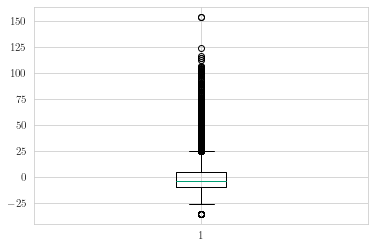

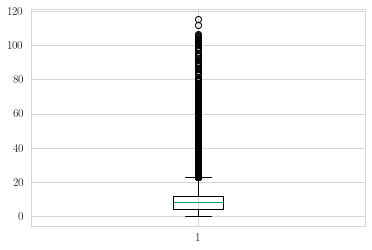

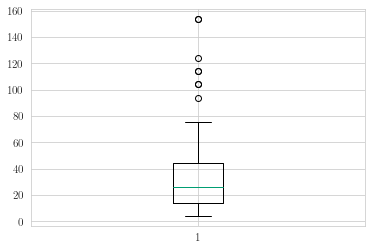

In [10]:
# Mean
x = df['water_level'].to_numpy()
x_hat = df['water_level'].mean()
print(f'x_hat: {x_hat}')
print(f'mean(|x - xhat|) all values: {np.mean(np.abs(x - x_hat))}')
print(
    f'mean(|x - xhat|) regular values: {np.mean(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))}')
print(
    f'mean(|x - xhat|) outlier values: {np.mean(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))}')
plt.boxplot(x - x_hat)
plt.show()
plt.boxplot(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))
plt.show()
plt.boxplot(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))
plt.show()



x_hat: 31.7
mean(|x - xhat|) all values: 9.620320717937402
mean(|x - xhat|) regular values: 9.04185302311573
mean(|x - xhat|) outlier values: 34.12631578947369


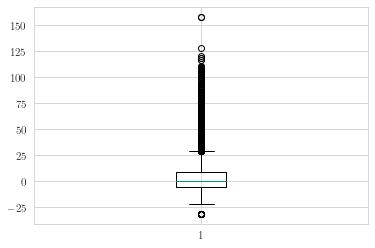

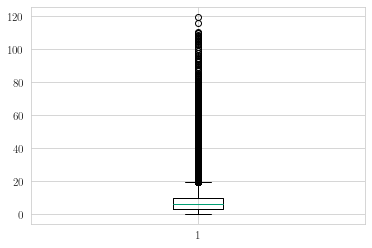

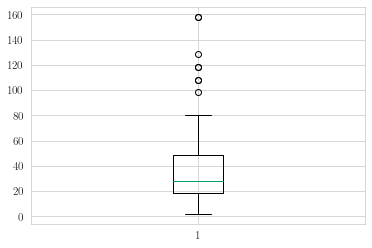

In [21]:
# Median
x_hat = df['water_level'].median()
print(f'x_hat: {x_hat}')
print(f'mean(|x - xhat|) all values: {np.mean(np.abs(x - x_hat))}')
print(
    f'mean(|x - xhat|) regular values: {np.mean(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))}')
print(
    f'mean(|x - xhat|) outlier values: {np.mean(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))}')
plt.boxplot(x - x_hat)
plt.show()
plt.boxplot(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))
plt.show()
plt.boxplot(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))
plt.show()


x_hat: 6.199999999999999
mean(|x - xhat|) all values: 29.815226746110557
mean(|x - xhat|) regular values: 29.1911941871847
mean(|x - xhat|) outlier values: 56.25151515151515
median(|x - xhat|) all values: 25.5
median(|x - xhat|) regular values: 25.2
median(|x - xhat|) outlier values: 53.8


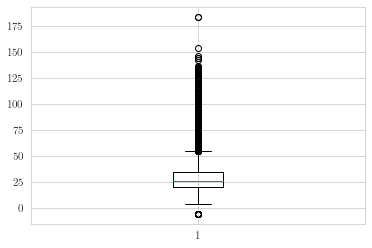

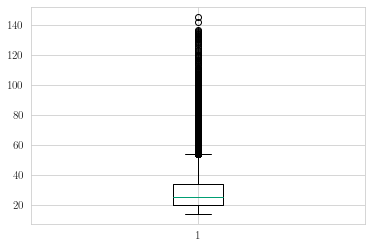

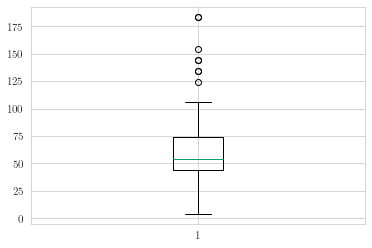

In [31]:
# MAD
x_hat = np.median(np.abs(df['water_level'] - df['water_level'].median()))
print(f'x_hat: {x_hat}')
print(f'mean(|x - xhat|) all values: {np.mean(np.abs(x - x_hat))}')
print(
    f'mean(|x - xhat|) regular values: {np.mean(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))}')
print(
    f'mean(|x - xhat|) outlier values: {np.mean(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))}')
print(f'median(|x - xhat|) all values: {np.median(np.abs(x - x_hat))}')
print(
    f'median(|x - xhat|) regular values: {np.median(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))}')
print(
    f'median(|x - xhat|) outlier values: {np.median(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))}')

plt.boxplot(x - x_hat)
plt.show()
plt.boxplot(np.abs(df.loc[~df["is_outlier"], "water_level"] - x_hat))
plt.show()
plt.boxplot(np.abs(df.loc[df["is_outlier"], "water_level"] - x_hat))
plt.show()

In [38]:

scores = []
# score_df = pd.DataFrame(
#     columns=['f1_test', 'f1_train', 'precision_test', 'precision_train',
#              'recall_test', 'recall_train', 'threshold',
#              'percentage_outlier_test', 'percentage_outlier_train'])
for i in tqdm(np.linspace(0, 100, 100)):
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        y_pred_train = np.where(np.abs(X_train - x_hat) > i, 1, 0)
        y_pred_test = np.where(np.abs(X_test - x_hat) > i, 1, 0)
        # row = pd.Series([f1_score(y_test, y_pred_test, zero_division=0),
        #                  f1_score(y_train, y_pred_train, zero_division=0),
        #                  precision_score(y_test, y_pred_test, zero_division=0),
        #                  precision_score(y_train, y_pred_train,
        #                                  zero_division=0),
        #                  recall_score(y_test, y_pred_test, zero_division=0),
        #                  recall_score(y_train, y_pred_train, zero_division=0),
        #                  i,
        #                  len(y_test[y_test == 1]) / len(y_test),
        #                  len(y_train[y_train == 1]) / len(y_train)
        #                  ], index=score_df.columns)
        scores.append({
            'f1_test': f1_score(y_test, y_pred_test, zero_division=0),
            'f1_train': f1_score(y_train, y_pred_train, zero_division=0),
            'precision_test': precision_score(y_test, y_pred_test, zero_division=0),
            'precision_train': precision_score(y_train, y_pred_train, zero_division=0),
            'recall_test': recall_score(y_test, y_pred_test, zero_division=0),
            'recall_train': recall_score(y_train, y_pred_train, zero_division=0),
            'threshold': i,
            'percentage_outlier_truth_test': len(y_test[y_test == 1]) / len(y_test),
            'percentage_outlier_truth_train': len(y_train[y_train == 1]) / len(y_train),
            'percentage_outlier_pred_test': len(y_pred_test[y_pred_test == 1]) / len(y_pred_test),
            'percentage_outlier_pred_train': len(y_pred_train[y_pred_train == 1]) / len(y_pred_train)
        })
        # score_df = score_df.append(row, ignore_index=True)
score_df = pd.DataFrame(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

In [39]:
score_df

,f1_test,f1_train,precision_test,precision_train,recall_test,recall_train,threshold,percentage_outlier_truth_test,percentage_outlier_truth_train,percentage_outlier_pred_test,percentage_outlier_pred_train
0,0.054731,0.042655,0.028135,0.021792,1.000000,1.000000,0.0,0.028135,0.021792,1.000000,1.000000
1,0.045642,0.044942,0.023354,0.022987,1.000000,1.000000,0.0,0.023354,0.022987,1.000000,1.000000
2,0.038593,0.046697,0.019676,0.023907,1.000000,1.000000,0.0,0.019676,0.023907,1.000000,1.000000
3,0.055079,0.042567,0.028319,0.021746,1.000000,1.000000,0.0,0.028319,0.021746,1.000000,1.000000
4,0.031142,0.048535,0.015818,0.024871,1.000000,1.000000,0.0,0.015818,0.024871,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
495,0.034091,0.022059,0.130435,0.085714,0.019608,0.012658,100.0,0.028135,0.021792,0.004229,0.003218
496,0.043796,0.020583,0.300000,0.072289,0.023622,0.012000,100.0,0.023354,0.022987,0.001839,0.003816
497,0.033333,0.023333,0.153846,0.087500,0.018692,0.013462,100.0,0.019676,0.023907,0.002391,0.003678
498,0.011429,0.029358,0.047619,0.111111,0.006494,0.016913,100.0,0.028319,0.021746,0.003862,0.003310


In [40]:
score_df.groupby('threshold').mean()

,f1_test,f1_train,precision_test,precision_train,recall_test,recall_train,percentage_outlier_truth_test,percentage_outlier_truth_train,percentage_outlier_pred_test,percentage_outlier_pred_train
threshold,,,,,,,,,,
0.000000,0.045038,0.045079,0.023061,0.023061,1.000000,1.000000,0.023061,0.023061,1.000000,1.000000
1.010101,0.045038,0.045079,0.023061,0.023061,1.000000,1.000000,0.023061,0.023061,1.000000,1.000000
2.020202,0.045038,0.045079,0.023061,0.023061,1.000000,1.000000,0.023061,0.023061,1.000000,1.000000
3.030303,0.045038,0.045079,0.023061,0.023061,1.000000,1.000000,0.023061,0.023061,1.000000,1.000000
4.040404,0.043482,0.043531,0.022267,0.022269,0.958459,0.964599,0.023061,0.023061,0.999191,0.999191
...,...,...,...,...,...,...,...,...,...,...
95.959596,0.025801,0.026690,0.099960,0.083360,0.014990,0.015911,0.023061,0.023061,0.004450,0.004450
96.969697,0.026170,0.026985,0.113339,0.089530,0.014990,0.015911,0.023061,0.023061,0.004156,0.004156
97.979798,0.024175,0.024514,0.115302,0.085473,0.013683,0.014334,0.023061,0.023061,0.003935,0.003935
